In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *


Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##In case drive is not loaded properly

In [0]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


##DEFINE CLASSES

In [0]:
classes = ['Sweep Shot', 'Drive Shot', 'Square Cut', 'Pull Shot', 'Umpire Out', 'Umpire Six', 'wide', 'lbw', 'Century']

In [0]:
path = Path(root_dir + 'University/Thesis/data_rgb/shots')

##LOADING IMAGES & NORMALIZATION

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="Train", test="Test", valid_pct=0.2,
 ds_tfms=get_transforms(max_rotate=0.5), size=(224,224), num_workers=4).normalize(imagenet_stats)

In [0]:
print(data)

ImageDataBunch;

Train: LabelList (2559 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Square Cut,Square Cut,Square Cut,Square Cut,Square Cut
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots;

Valid: LabelList (639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Century,Pull Shot,Pull Shot,Umpire Six,Drive Shot
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots;

Test: LabelList (16 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/University/Thesis/data_rgb/shots


In [0]:
print(data.test_ds.items)

[PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/PullShot_347.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/PullShot_351.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/SquareCut_233.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/SquareCut_260.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/StraightDrive_308.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/StraightDrive_307.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/SweepShot_271.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/SweepShot_298.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/Six_240.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/data_rgb/shots/Test/Six_239.jpg')
 PosixPath('/content/gdrive/My Drive/University/Thesis/d

['Century', 'Drive Shot', 'Pull Shot', 'Square Cut', 'Sweep Shot', 'Umpire Out', 'Umpire Six', 'lbw', 'wide']


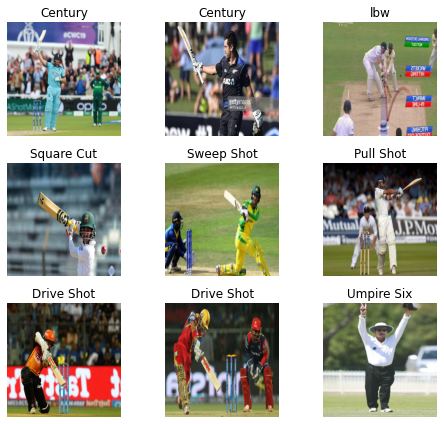

In [0]:
print(data.classes)
data.show_batch(rows=3, figsize=(7,6))

##CNN

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


##Model

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

##Training

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.709465,0.961186,0.748044,08:43
1,1.060350,0.605308,0.805947,01:20
2,0.718084,0.354950,0.871674,01:16
3,0.493888,0.323552,0.895149,01:15
4,0.355523,0.307208,0.895149,01:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


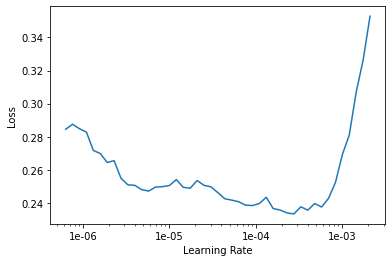

In [0]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load('stage-1');

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.224760,0.221857,0.928012,01:14
1,0.197907,0.187516,0.937402,01:14
2,0.145837,0.176342,0.951487,01:15
3,0.098281,0.140210,0.962441,01:13
4,0.065014,0.136122,0.960876,01:14


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(2e-5,2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.050312,0.109210,0.970266,01:16


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.037049,0.104797,0.970266,01:15


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(0.5e-5,0.5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.039505,0.095476,0.971831,01:15
1,0.032118,0.077492,0.974961,01:14


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

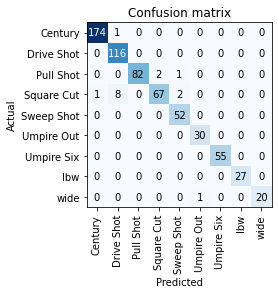

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('Square Cut', 'Drive Shot', 8),
 ('Pull Shot', 'Square Cut', 2),
 ('Square Cut', 'Sweep Shot', 2),
 ('Century', 'Drive Shot', 1),
 ('Pull Shot', 'Sweep Shot', 1),
 ('Square Cut', 'Century', 1),
 ('wide', 'Umpire Out', 1)]

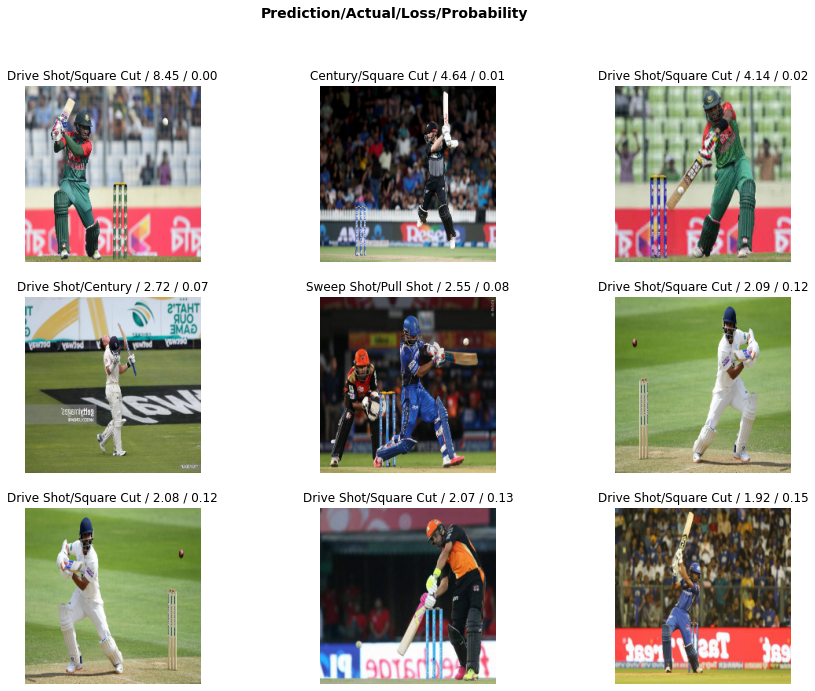

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
predictions, targs = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

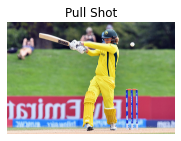

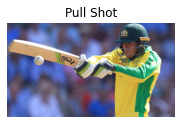

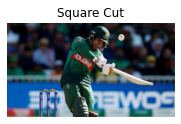

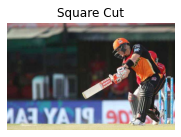

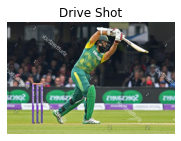

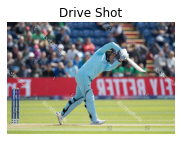

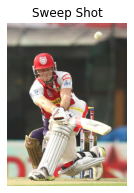

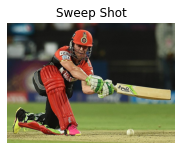

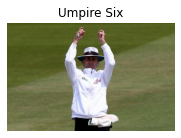

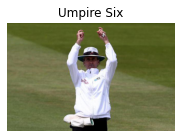

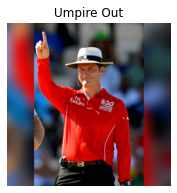

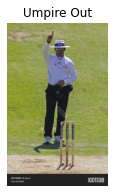

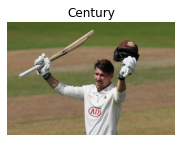

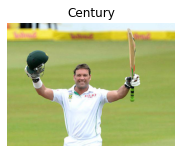

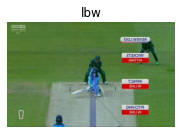

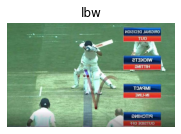

In [0]:
test_predictions_direct = [data.classes[int(x)] for x in labels]

for i in range(len(test_predictions_direct)):
  img = open_image(data.test_ds.items[i])
  img.show(title=test_predictions_direct[i])

##SAVE MODEL

In [0]:
learn.export()

##PREDICTION

In [0]:
defaults.device = torch.device('cuda')

In [0]:
learn = load_learner(path)

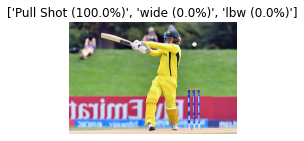

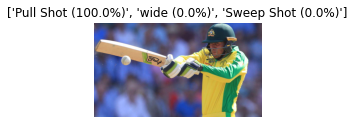

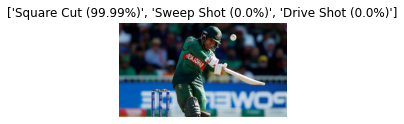

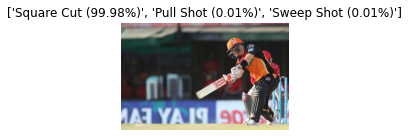

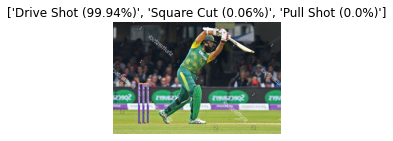

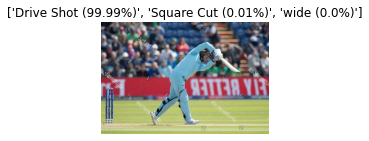

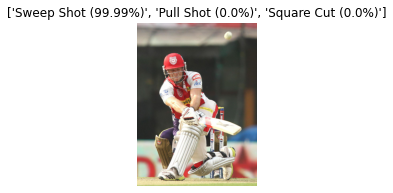

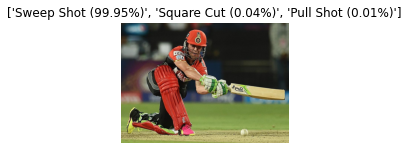

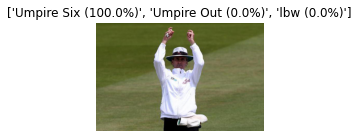

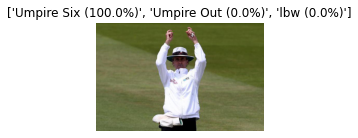

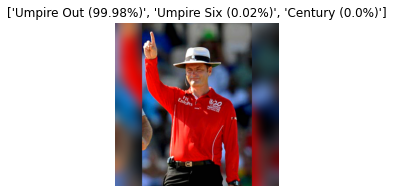

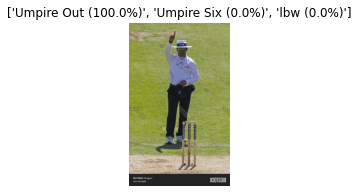

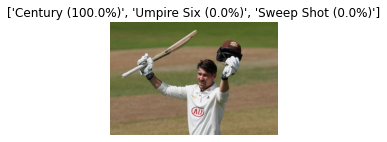

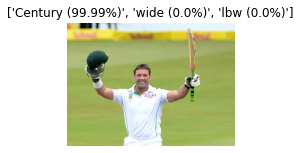

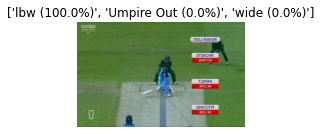

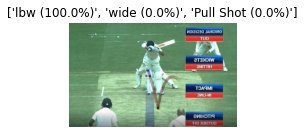

In [0]:
for i in data.test_ds.items:
  img = open_image(i)

  # Get best first prediction
  pred_1_class, indice, preds = learn.predict(img)

  # Get all best predictions
  preds_sorted, idxs = preds.sort(descending=True)

  # Get best 3 predictions - classes
  pred_2_class = learn.data.classes[idxs[1]]
  pred_3_class = learn.data.classes[idxs[2]]
    
  # Get best 3 predictions - probabilities
  pred_1_prob = np.round(100*preds_sorted[0].item(),2)
  pred_2_prob = np.round(100*preds_sorted[1].item(),2)
  pred_3_prob = np.round(100*preds_sorted[2].item(),2)
  preds_best3 = [f'{pred_1_class} ({pred_1_prob}%)', f'{pred_2_class} ({pred_2_prob}%)', f'{pred_3_class} ({pred_3_prob}%)']

  img.show(title=preds_best3)